In [3]:
!pip install pycaret --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━

In [4]:
import pycaret
pycaret.__version__

'3.3.2'

In [5]:
from pycaret.datasets import get_data
dataset=get_data('juice')
dataset.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [6]:
#from pycaret.utils import enable_colab
#enable_colab()

In [7]:
dataset.shape

(1070, 19)

In [8]:
data=dataset.sample(frac=0.95,random_state=786).reset_index(drop=True)
data_unseen=dataset.drop(data.index).reset_index(drop=True)
print("Data for modeling-"+str(data.shape))
print("Unseen data for predictions:"+str(data_unseen.shape))


Data for modeling-(1016, 19)
Unseen data for predictions:(54, 19)


In [9]:
from pycaret.classification import*

In [10]:
expbinary=setup(data=data,target='Purchase',session_id=123)

,Description,Value
0,Session id,123
1,Target,Purchase
2,Target type,Binary
3,Target mapping,"CH: 0, MM: 1"
4,Original data shape,"(1016, 19)"
5,Transformed data shape,"(1016, 19)"
6,Transformed train set shape,"(711, 19)"
7,Transformed test set shape,"(305, 19)"
8,Numeric features,17
9,Categorical features,1


In [11]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8100,0.8767,0.8100,0.8107,0.8086,0.5929,0.5957,0.1180
gbc,Gradient Boosting Classifier,0.8100,0.8740,0.8100,0.8094,0.8088,0.5929,0.5943,0.2730
lr,Logistic Regression,0.8086,0.8751,0.8086,0.8088,0.8061,0.5863,0.5903,1.6050
lda,Linear Discriminant Analysis,0.8015,0.8766,0.8015,0.8026,0.8000,0.5746,0.5779,0.0760
rf,Random Forest Classifier,0.7974,0.8547,0.7974,0.7976,0.7964,0.5673,0.5690,0.5350
ada,Ada Boost Classifier,0.7889,0.8483,0.7889,0.7875,0.7863,0.5436,0.5465,0.1960
lightgbm,Light Gradient Boosting Machine,0.7862,0.8519,0.7862,0.7850,0.7847,0.5414,0.5427,0.5370
xgboost,Extreme Gradient Boosting,0.7749,0.8481,0.7749,0.7738,0.7734,0.5177,0.5190,0.2730
et,Extra Trees Classifier,0.7553,0.8291,0.7553,0.7537,0.7528,0.4732,0.4755,0.3430
dt,Decision Tree Classifier,0.7524,0.7404,0.7524,0.7559,0.7527,0.4785,0.4805,0.0760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [12]:
ridge=create_model('ridge')
print(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9028,0.9424,0.9028,0.9037,0.9031,0.7968,0.7971
1,0.7324,0.7702,0.7324,0.7306,0.7314,0.4281,0.4283
2,0.7887,0.9141,0.7887,0.7905,0.7894,0.5550,0.5552
3,0.7887,0.8864,0.7887,0.7863,0.7860,0.5419,0.5442
4,0.9014,0.9478,0.9014,0.9010,0.9010,0.7893,0.7897
5,0.8028,0.8502,0.8028,0.8066,0.8040,0.5876,0.5886
6,0.8310,0.8981,0.8310,0.8296,0.8296,0.6362,0.6374
7,0.7324,0.8409,0.7324,0.7272,0.7259,0.4112,0.4162
8,0.8451,0.8746,0.8451,0.8526,0.8392,0.6540,0.6704


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


In [13]:
gbc=create_model('gbc')
print(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9407,0.8889,0.8887,0.8881,0.7632,0.7645
1,0.8028,0.8190,0.8028,0.8011,0.7992,0.5693,0.5737
2,0.8169,0.9099,0.8169,0.8158,0.8162,0.6087,0.6090
3,0.7746,0.8620,0.7746,0.7746,0.7746,0.5219,0.5219
4,0.8028,0.9192,0.8028,0.8028,0.8028,0.5816,0.5816
5,0.7465,0.8392,0.7465,0.7436,0.7444,0.4543,0.4551
6,0.8310,0.8763,0.8310,0.8310,0.8310,0.6414,0.6414
7,0.8028,0.8426,0.8028,0.8011,0.7992,0.5693,0.5737
8,0.8451,0.8758,0.8451,0.8443,0.8431,0.6641,0.6669


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [14]:
lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9440,0.8889,0.8889,0.8889,0.7662,0.7662
1,0.7324,0.7702,0.7324,0.7282,0.7289,0.4198,0.4216
2,0.8028,0.9184,0.8028,0.8028,0.8028,0.5816,0.5816
3,0.7746,0.8771,0.7746,0.7717,0.7705,0.5078,0.5117
4,0.9014,0.9487,0.9014,0.9010,0.9010,0.7893,0.7897
5,0.7887,0.8510,0.7887,0.7905,0.7894,0.5550,0.5552
6,0.8310,0.8923,0.8310,0.8306,0.8279,0.6308,0.6357
7,0.7465,0.8283,0.7465,0.7426,0.7387,0.4380,0.4459
8,0.8310,0.8721,0.8310,0.8408,0.8233,0.6196,0.6406


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
tuned_ridge=tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9424,0.8889,0.8889,0.8889,0.7662,0.7662
1,0.7183,0.7719,0.7183,0.7149,0.7160,0.3937,0.3944
2,0.7887,0.9141,0.7887,0.7905,0.7894,0.5550,0.5552
3,0.7887,0.8805,0.7887,0.7863,0.7860,0.5419,0.5442
4,0.9014,0.9512,0.9014,0.9010,0.9010,0.7893,0.7897
5,0.8169,0.8493,0.8169,0.8185,0.8175,0.6143,0.6146
6,0.8310,0.8939,0.8310,0.8296,0.8296,0.6362,0.6374
7,0.7465,0.8367,0.7465,0.7426,0.7387,0.4380,0.4459
8,0.8451,0.8754,0.8451,0.8526,0.8392,0.6540,0.6704


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [16]:
print(tuned_ridge)

RidgeClassifier(alpha=5.62, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


In [17]:
tuned_gbc=tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.9107,0.8750,0.8745,0.8746,0.7353,0.7356
1,0.7606,0.7727,0.7606,0.7572,0.7575,0.4809,0.4829
2,0.8169,0.9285,0.8169,0.8153,0.8145,0.6030,0.6056
3,0.7746,0.8493,0.7746,0.7717,0.7705,0.5078,0.5117
4,0.8028,0.9217,0.8028,0.8066,0.8040,0.5876,0.5886
5,0.7606,0.8005,0.7606,0.7572,0.7575,0.4809,0.4829
6,0.8169,0.8586,0.8169,0.8158,0.8162,0.6087,0.6090
7,0.7887,0.8098,0.7887,0.7871,0.7836,0.5351,0.5417
8,0.8169,0.8565,0.8169,0.8153,0.8145,0.6030,0.6056


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [18]:
tuned_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9028,0.9448,0.9028,0.9037,0.9031,0.7968,0.7971
1,0.7324,0.7736,0.7324,0.7282,0.7289,0.4198,0.4216
2,0.7887,0.9184,0.7887,0.7905,0.7894,0.5550,0.5552
3,0.7746,0.8796,0.7746,0.7717,0.7705,0.5078,0.5117
4,0.9014,0.9495,0.9014,0.9010,0.9010,0.7893,0.7897
5,0.7887,0.8510,0.7887,0.7905,0.7894,0.5550,0.5552
6,0.8451,0.8965,0.8451,0.8443,0.8431,0.6641,0.6669
7,0.7324,0.8342,0.7324,0.7279,0.7223,0.4023,0.4124
8,0.8310,0.8737,0.8310,0.8341,0.8258,0.6253,0.6366


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


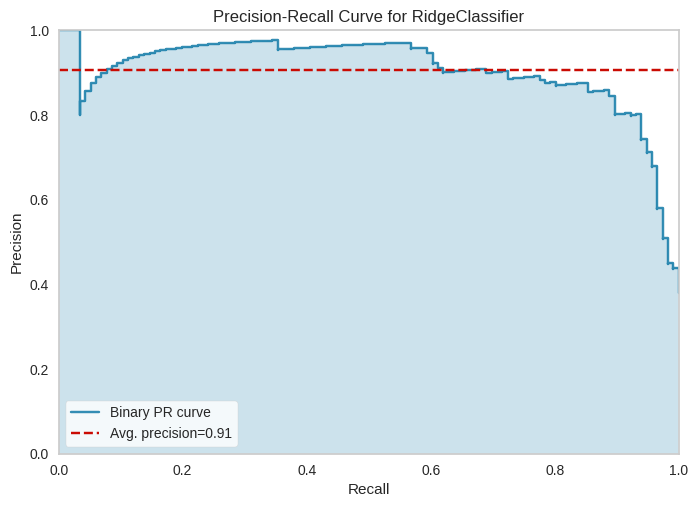

In [22]:
plot_model(tuned_ridge,plot='pr')

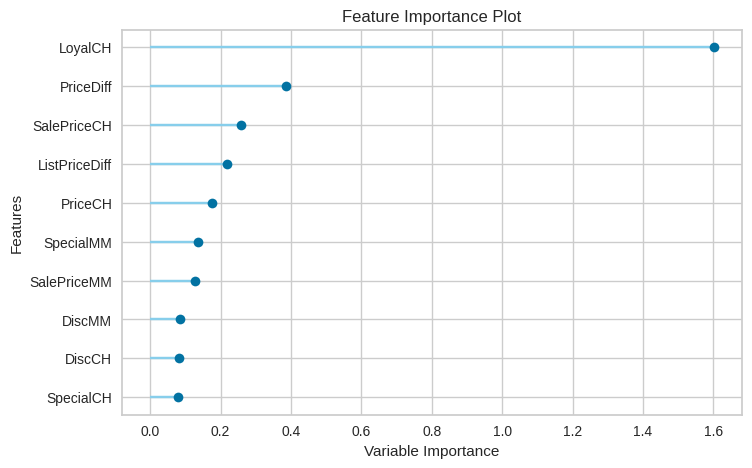

In [23]:
plot_model(tuned_ridge,plot='feature')

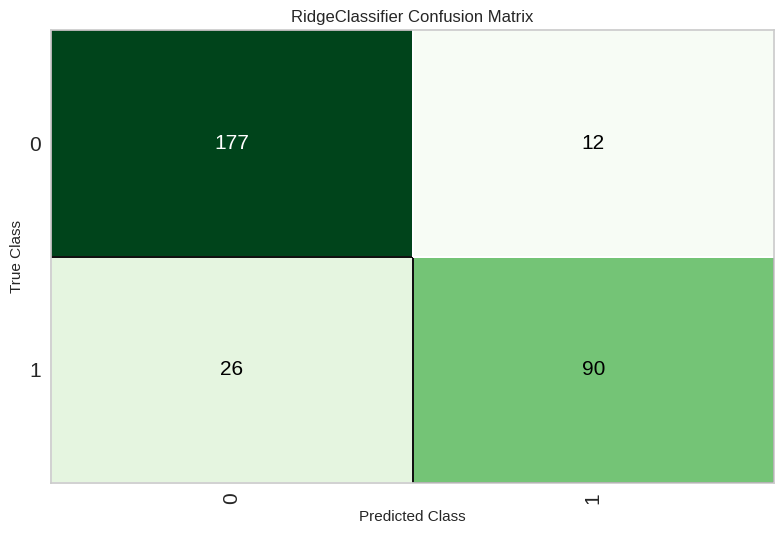

In [24]:
plot_model(tuned_ridge,plot='confusion_matrix')

In [25]:
evaluate_model(tuned_lr)#it displays a user interface for all of available plots for given mmodel.It internally uses the plot_model() function

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8820,0.9433,0.8820,0.8821,0.8806,0.7445,0.7472


,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,...,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Purchase,prediction_label,prediction_score
214,110,249,2,1.89,2.09,0.00,0.00,0,0,0.916872,...,1.89,0.20,No,0.000000,0.000000,0.20,2,CH,CH,0.9267
507,544,228,3,1.79,1.79,0.00,0.00,0,0,0.266240,...,1.79,0.00,No,0.000000,0.000000,0.00,3,MM,MM,0.7652
446,998,231,7,1.69,1.99,0.00,0.00,0,0,0.680000,...,1.69,0.30,Yes,0.000000,0.000000,0.30,0,MM,CH,0.8563
1009,820,274,7,1.86,2.13,0.47,0.54,1,0,0.985926,...,1.39,0.20,Yes,0.253521,0.252688,0.27,0,CH,CH,0.9638
875,265,276,2,1.99,2.18,0.00,0.00,0,1,0.645286,...,1.99,0.19,No,0.000000,0.000000,0.19,2,CH,CH,0.7168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,621,269,7,1.86,2.13,0.27,0.00,1,0,0.893270,...,1.59,0.54,Yes,0.000000,0.145161,0.27,0,CH,CH,0.9716
109,693,231,3,1.79,1.79,0.00,0.00,0,0,0.021990,...,1.79,0.00,No,0.000000,0.000000,0.00,3,MM,MM,0.9160
673,831,274,4,1.99,2.09,0.00,0.40,0,0,0.965145,...,1.99,-0.30,No,0.191388,0.000000,0.10,4,CH,CH,0.7904
92,78,251,4,1.99,2.23,0.00,0.00,0,0,0.836160,...,1.99,0.24,No,0.000000,0.000000,0.24,4,CH,CH,0.9012


In [30]:
saved_final_lr=finalize_model(tuned_lr)
print(saved_final_lr)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Id', 'WeekofPurchase', 'StoreID',
                                             'PriceCH', 'PriceMM', 'DiscCH',
                                             'DiscMM', 'SpecialCH', 'SpecialMM',
                                             'LoyalCH', 'SalePriceMM',
                                             'SalePriceCH', 'PriceDi...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': No     0
Yes    1
NaN   -1
dtype: int64}],
                                                               return_df=True,
 

In [32]:
predict_model(saved_final_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8885,0.9448,0.8885,0.8882,0.8877,0.7603,0.7615


,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,...,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Purchase,prediction_label,prediction_score
214,110,249,2,1.89,2.09,0.00,0.00,0,0,0.916872,...,1.89,0.20,No,0.000000,0.000000,0.20,2,CH,CH,0.9364
507,544,228,3,1.79,1.79,0.00,0.00,0,0,0.266240,...,1.79,0.00,No,0.000000,0.000000,0.00,3,MM,MM,0.8084
446,998,231,7,1.69,1.99,0.00,0.00,0,0,0.680000,...,1.69,0.30,Yes,0.000000,0.000000,0.30,0,MM,CH,0.8810
1009,820,274,7,1.86,2.13,0.47,0.54,1,0,0.985926,...,1.39,0.20,Yes,0.253521,0.252688,0.27,0,CH,CH,0.9802
875,265,276,2,1.99,2.18,0.00,0.00,0,1,0.645286,...,1.99,0.19,No,0.000000,0.000000,0.19,2,CH,CH,0.7132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,621,269,7,1.86,2.13,0.27,0.00,1,0,0.893270,...,1.59,0.54,Yes,0.000000,0.145161,0.27,0,CH,CH,0.9825
109,693,231,3,1.79,1.79,0.00,0.00,0,0,0.021990,...,1.79,0.00,No,0.000000,0.000000,0.00,3,MM,MM,0.9423
673,831,274,4,1.99,2.09,0.00,0.40,0,0,0.965145,...,1.99,-0.30,No,0.191388,0.000000,0.10,4,CH,CH,0.8545
92,78,251,4,1.99,2.23,0.00,0.00,0,0,0.836160,...,1.99,0.24,No,0.000000,0.000000,0.24,4,CH,CH,0.9207


In [34]:
unseen_predictions=predict_model(saved_final_lr,data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7593,0.6886,0.7593,0.7416,0.7478,0.2851,0.2891


,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,...,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Purchase,prediction_label,prediction_score
0,1017,236,7,1.75,1.99,0.0,0.4,0,0,0.908732,...,1.75,-0.16,Yes,0.201005,0.0,0.24,0,CH,CH,0.8996
1,1018,237,7,1.75,1.99,0.0,0.4,0,0,0.926986,...,1.75,-0.16,Yes,0.201005,0.0,0.24,0,CH,CH,0.9085
2,1019,240,7,1.86,2.09,0.0,0.0,0,0,0.941588,...,1.86,0.23,Yes,0.000000,0.0,0.23,0,CH,CH,0.9572
3,1020,240,7,1.86,2.09,0.0,0.0,0,0,0.953271,...,1.86,0.23,Yes,0.000000,0.0,0.23,0,MM,CH,0.9596
4,1021,244,7,1.86,2.09,0.0,0.2,0,0,0.762617,...,1.86,0.03,Yes,0.095694,0.0,0.23,0,MM,CH,0.8510


In [35]:
save_model(saved_final_lr,'Final LR Model')
saved_final_lr=load_model('Final LR Model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [36]:
new_prediction=predict_model(saved_final_lr,data=data_unseen)
new_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7593,0.6886,0.7593,0.7416,0.7478,0.2851,0.2891


,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,...,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Purchase,prediction_label,prediction_score
0,1017,236,7,1.75,1.99,0.0,0.4,0,0,0.908732,...,1.75,-0.16,Yes,0.201005,0.0,0.24,0,CH,CH,0.8996
1,1018,237,7,1.75,1.99,0.0,0.4,0,0,0.926986,...,1.75,-0.16,Yes,0.201005,0.0,0.24,0,CH,CH,0.9085
2,1019,240,7,1.86,2.09,0.0,0.0,0,0,0.941588,...,1.86,0.23,Yes,0.000000,0.0,0.23,0,CH,CH,0.9572
3,1020,240,7,1.86,2.09,0.0,0.0,0,0,0.953271,...,1.86,0.23,Yes,0.000000,0.0,0.23,0,MM,CH,0.9596
4,1021,244,7,1.86,2.09,0.0,0.2,0,0,0.762617,...,1.86,0.03,Yes,0.095694,0.0,0.23,0,MM,CH,0.8510
